<a href="https://colab.research.google.com/github/cardstdani/algorithms/blob/main/FIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# @title **Librerías y funciones útiles**

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from IPython.display import display, HTML
import math

def plotGrafo(grafo, h=(lambda n:0)):
    G = nx.Graph()
    for node, neighbors in grafo.items():
        G.add_edges_from((node, neighbor) for neighbor, weight in neighbors)

    pos = nx.kamada_kawai_layout(G, scale=len(grafo))
    nx.draw(G, pos, labels={node: f"{node}({h(node)})" for node in grafo} ,with_labels=True, node_color='lightgreen', arrows=True, edge_color='gray', font_size=9)
    edge_labels = {(node, neighbor): weight for node, neighbors in grafo.items() for neighbor, weight in neighbors}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_weight="light")
    plt.show()

def plotTable(trace):
    df = pd.DataFrame({
        "Nodo": list(trace.keys()),
        "Open": [str(state[0]) for state in trace.values()],
        "Closed": [str(state[1]) for state in trace.values()]
    })
    display(df.style.set_table_styles([{'selector': 'th, td', 'props': [('text-align', 'left')]}]))

In [33]:
# @title **Grafos y heurísticas**
# @markdown Definición de grafos y algunas heurísticas.
# @markdown - $grafo[i]$ para usar el grafo número $i$
# @markdown - $h(nodo), h1(nodo), h2(nodo) \cdots hi(nodo)$ para usar las heurísticas.

grafos = [
{
    'A': [('B', 3), ('C', 1)],
    'B': [('D', 3)],
    'C': [('B', 1)],
    'D': []
},
{
    'A': [('B', 1), ('C', 1), ('D', 1)],
    'B': [('E', 2), ('F', 3)],
    'C': [('G', 4), ('H', 5)],
    'D': [('I', 6), ('J', 7)],
    'E': [('K', 8)],
    'F': [('L', 9), ('M', 10)],
    'G': [('N', 11), ('O', 12)],
    'H': [('P', 13)],
    'I': [('Q', 14)],
    'J': [('R', 15)],
    'K': [('S', 16)],
    'L': [('T', 17)],
    'M': [],
    'N': [('U', 18)],
    'O': [],
    'P': [],
    'Q': [],
    'R': [],
    'S': [],
    'T': [],
    'U': []
},
{
    'A': [('B', 1), ('C', 1), ('D', 1)],
    'B': [('E', 1), ('F', 1)],
    'C': [('G', 1), ('H', 1)],
    'D': [('I', 1), ('J', 1)],
    'E': [('K', 1), ('L', 1)],
    'F': [('L', 1), ('M', 1)],
    'G': [('N', 1)],
    'H': [('O', 1), ('P', 1)],
    'I': [('P', 1), ('Q', 1)],
    'J': [('R', 1)],
    'K': [],
    'L': [],
    'M': [],
    'N': [],
    'O': [],
    'P': [],
    'Q': [],
    'R': []
},
{
    'S': [('A', 2), ('C', 1), ('H', 2)],
    'A': [('B', 2)],
    'B': [('G', 2), ('K', 3)],
    'C': [('D', 1)],
    'D': [('E', 1)],
    'E': [('F', 1)],
    'F': [('K', 1)],
    'G': [('I', 2)],
    'H': [('L', 1)],
    'I': [('J', 1), ('K', 5)],
    'J': [],
    'K': [],
    'L': []
},
{
    'A': [('B', 0), ('C', 0), ('D', 0)],
    'B': [('E', 0), ('F', 0)],
    'C': [('G', 0), ('H', 0)],
    'D': [('I', 0), ('J', 0)],
    'E': [('K', 0), ('L', 0)],
    'F': [('M', 0), ('N', 0)],
    'G': [('O', 0)],
    'H': [('P', 0), ('Q', 0)],
    'I': [('R', 0), ('S', 0)],
    'J': [('T', 0), ('U', 0)],
    'K': [],
    'L': [],
    'M': [],
    'N': [],
    'O': [],
    'P': [],
    'Q': [],
    'R': [],
    'S': [],
    'T': [],
    'U': []
}, #4 poda alfa beta grafo 1
{
    'A': [('B', 0), ('C', 0)],
    'B': [('D', 0), ('E', 0), ('F', 0)],
    'C': [('G', 0), ('H', 0)],
    'D': [('I', 0), ('J', 0), ('K', 0)],
    'E': [('L', 0), ('M', 0), ('N', 0)],
    'F': [('O', 0), ('P', 0), ('Q', 0)],
    'G': [('R', 0), ('S', 0), ('T', 0)],
    'H': [('U', 0),  ('V', 0)],
    'I': [],
    'J': [],
    'K': [],
    'L': [],
    'M': [],
    'N': [],
    'O': [],
    'P': [],
    'Q': [],
    'R': [],
    'S': [],
    'T': [],
    'U': [],
    'V': []
}, #5 poda alfa beta grafo 2
{
    'A': [('B', 0), ('C', 0), ('D', 0)],
    'B': [('E', 0), ('F', 0)],
    'C': [('G', 0), ('H', 0), ('I', 0)],
    'D': [('J', 0), ('K', 0)],
    'E': [('L', 0), ('M', 0), ('N', 0)],
    'F': [('O', 0), ('P', 0)],
    'G': [('Q', 0), ('R', 0)],
    'H': [('S', 0)],
    'I': [('T', 0), ('U', 0), ('V', 0), ('W', 0)],
    'J': [('X', 0), ('Y', 0)],
    'K': [('Z', 0), ('AA', 0), ('AB', 0)],
    'L': [],
    'M': [],
    'N': [],
    'O': [],
    'P': [],
    'Q': [],
    'R': [],
    'S': [],
    'T': [],
    'U': [],
    'V': [],
    'W': [],
    'X': [],
    'Y': [],
    'Z': [],
    'AA': [],
    'AB': []
}, #6 poda alfa beta grafo 3
{
    'A': [('B', 0), ('C', 0), ('D', 0)],
    'B': [('E', 0), ('F', 0), ('G', 0)],
    'C': [('H', 0), ('I', 0), ('J', 0)],
    'D': [('K', 0), ('L', 0), ('M', 0)],
    'E': [('N', 0), ('O', 0), ('P', 0)],
    'F': [('Q', 0), ('R', 0), ('S', 0)],
    'G': [('T', 0), ('U', 0), ('V', 0)],
    'H': [('W', 0), ('X', 0), ('Y', 0)],
    'I': [('Z', 0), ('AA', 0), ('AB', 0)],
    'J': [('AC', 0), ('AD', 0), ('AE', 0)],
    'K': [('AF', 0), ('AG', 0), ('AH', 0)],
    'L': [('AI', 0), ('AJ', 0), ('AK', 0)],
    'M': [('AL', 0), ('AM', 0), ('AN', 0)],
    'N': [],
    'O': [],
    'P': [],
    'Q': [],
    'R': [],
    'S': [],
    'T': [],
    'U': [],
    'V': [],
    'W': [],
    'X': [],
    'Y': [],
    'Z': [],
    'AA': [],
    'AB': [],
    'AC': [],
    'AD': [],
    'AE': [],
    'AF': [],
    'AG': [],
    'AH': [],
    'AI': [],
    'AJ': [],
    'AK': [],
    'AL': [],
    'AM': [],
    'AN': []
}, #7 poda alfa beta grafo 4
{
    'A': [('B', 0), ('C', 0), ('D', 0)],
    'B': [('E', 0), ('F', 0)],
    'C': [('G', 0), ('H', 0), ('I', 0)],
    'D': [('J', 0), ('K', 0), ('L', 0)],
    'E': [('M', 0), ('N', 0)],
    'F': [('O', 0)],
    'G': [('P', 0)],
    'H': [('Q', 0), ('R', 0)],
    'I': [('S', 0)],
    'J': [('T', 0), ('U', 0)],
    'K': [('V', 0), ('W', 0)],
    'L': [('X', 0)],
    'M': [('Y', 0), ('Z', 0)],
    'N': [('AA', 0), ('AB', 0)],
    'O': [('AC', 0), ('AD', 0)],
    'P': [('AE', 0), ('AF', 0)],
    'Q': [('AG', 0)],
    'R': [('AH', 0), ('AI', 0), ('AJ', 0)],
    'S': [('AK', 0)],
    'T': [('AL', 0), ('AM', 0)],
    'U': [('AN', 0)],
    'V': [('AO', 0), ('AP', 0)],
    'W': [('AQ', 0), ('AR', 0)],
    'X': [('AS', 0), ('AT', 0), ('AU', 0)],
    'Y': [],
    'Z': [],
    'AA': [],
    'AB': [],
    'AC': [],
    'AD': [],
    'AE': [],
    'AF': [],
    'AG': [],
    'AH': [],
    'AI': [],
    'AJ': [],
    'AK': [],
    'AL': [],
    'AM': [],
    'AN': [],
    'AO': [],
    'AP': [],
    'AQ': [],
    'AR': [],
    'AS': [],
    'AT': [],
    'AU': []
}, #8 poda alfa beta grafo 5
{
    'A': [('B', 0), ('C', 0), ('D', 0)],
    'B': [('E', 0), ('F', 0)],
    'C': [('G', 0), ('H', 0), ('I', 0)],
    'D': [('J', 0), ('K', 0), ('L', 0)],
    'E': [('M', 0), ('N', 0)],
    'F': [('O', 0), ('P', 0)],
    'G': [('Q', 0)],
    'H': [('R', 0), ('S', 0)],
    'I': [('T', 0)],
    'J': [('U', 0), ('V', 0)],
    'K': [('W', 0), ('X', 0)],
    'L': [('Y', 0), ('Z', 0)],
    'M': [('AA', 0), ('AB', 0)],
    'N': [('AC', 0), ('AD', 0), ('AE', 0), ('AF', 0)],
    'O': [('AG', 0), ('AH', 0)],
    'P': [('AI', 0), ('AJ', 0)],
    'Q': [('AK', 0), ('AL', 0), ('AM', 0)],
    'R': [('AN', 0), ('AO', 0), ('AP', 0)],
    'S': [('AQ', 0)],
    'T': [('AR', 0), ('AS', 0)],
    'U': [('AT', 0), ('AU', 0), ('AV', 0)],
    'V': [('AW', 0), ('AX', 0)],
    'W': [('AY', 0), ('AZ', 0)],
    'X': [('BA', 0), ('BB', 0), ('BC', 0)],
    'Y': [('BD', 0)],
    'Z': [('BE', 0), ('BF', 0)],
    'AA': [],
    'AB': [],
    'AC': [],
    'AD': [],
    'AE': [],
    'AF': [],
    'AG': [],
    'AH': [],
    'AI': [],
    'AJ': [],
    'AK': [],
    'AL': [],
    'AM': [],
    'AN': [],
    'AO': [],
    'AP': [],
    'AQ': [],
    'AR': [],
    'AS': [],
    'AT': [],
    'AU': [],
    'AV': [],
    'AW': [],
    'AX': [],
    'AY': [],
    'AZ': [],
    'BA': [],
    'BB': [],
    'BC': [],
    'BD': [],
    'BE': [],
    'BF': []
}, #9 poda alfa beta grafo 6
{
    'I': [('A', 2), ('B', 2)],
    'A': [('C', 1)],
    'B': [('D', 2)],
    'C': [('E', 1)],
    'D': [('G', 1)],
    'E': [('G', 3)],
    'G': []
},
{
    'A': [('B', 4), ('C', 10), ('D', 10), ('E', 15)],
    'B': [('F', 5)],
    'C': [('F', 20)],
    'D': [('F', 10)],
    'E': [('F', 3), ('H', 30)],
    'F': [('G', 35), ('H', 40)],
    'G': [],
    'H': [('Z', 2)],
    'Z': []
}
]

h = lambda n : {
    'A': 5, 'B': 4, 'C': 4, 'D': 6, 'E': 5, 'F': 5, 'G': 4, 'H': 3, 'I': 6, 'J': 7, 'K': 8, 'L': 9,
    'M': 10, 'N': 11, 'O': 2, 'P': 3, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'U': 18, 'V': 19, 'W': 20, 'X': 21, 'Y': 22, 'Z': 23
}.get(n, 0)

h1 = lambda n : {
    'S': 4, 'A': 2, 'B': 3, 'C': 4, 'D': 3, 'E': 2, 'F': 1, 'G': 4, 'H': 5, 'I': 5, 'J': 6, 'K': 0, 'L': 6
}.get(n, 0)

h2 = lambda n : {
    'K': 2, 'L': 3, 'M': 5, 'N': 9, 'O': 0, 'P': 7, 'Q': 4, 'R': 2, 'S': 1, 'T': 5, 'U': 6
}.get(n, 0) #Heurística de grafos[4], poda alfa beta

h3 = lambda n : {
    'I': 7, 'J': 6, 'K': 8, 'L': 5, 'M': 2, 'N': 3, 'O': 6, 'P': -2, 'Q': 0, 'R': 2, 'S': 5, 'T': 8, 'U': 9, 'V': 2
}.get(n, 0) #Heurística de grafos[5], poda alfa beta

h4 = lambda n : {
    'L': 3, 'M': 5, 'N': 4, 'O': 6, 'P': 9, 'Q': 6, 'R': 7, 'S': 4, 'T': 20, 'U': 1, 'V': -3, 'W': 10, 'X': 8, 'Y': 5, 'Z': 10, 'AA': 1, 'AB': -5
}.get(n, 0) #Heurística de grafos[6], poda alfa beta

h5 = lambda n : {
    'N': 8, 'O': 7, 'P': 2, 'Q': 9, 'R': 1, 'S': 6, 'T': 2, 'U': 4, 'V': 1, 'W': 1, 'X': 3, 'Y': 5, 'Z': 3, 'AA': 9, 'AB': 2, 'AC': 6, 'AD': 5, 'AE': 2, 'AF': 1, 'AG': 2, 'AH': 3, 'AI': 9, 'AJ': 7, 'AK': 2, 'AL': 16, 'AM': 6, 'AN': 4
}.get(n, 0) #Heurística de grafos[7], poda alfa beta

h6 = lambda n : {
    'Y': 5, 'Z': 7, 'AA': 2, 'AB': -1, 'AC': 4, 'AD': 1, 'AE': -6, 'AF': 4, 'AG': 8, 'AH': -1, 'AI': 0, 'AJ': 4, 'AK': 3, 'AL': 2, 'AM': 1, 'AN': 5, 'AO': 3, 'AP': -4, 'AQ': 0, 'AR': 8, 'AS': 6, 'AT': -2, 'AU': -1
}.get(n, 0) #Heurística de grafos[8], poda alfa beta

h7 = lambda n : {
    'AA': 7, 'AB': 2, 'AC': 2, 'AD': 8, 'AE': -2, 'AF': 9, 'AG': -1, 'AH': 3, 'AI': 5, 'AJ': 2, 'AK': 6, 'AL': 8, 'AM': 4, 'AN': 1, 'AO': -5, 'AP': 8, 'AQ': -7, 'AR': 6, 'AS': 0, 'AT': 1, 'AU': 2, 'AV': 3, 'AW': 5, 'AX': 0, 'AY': 10, 'AZ': 3,
    'BA': -2, 'BB': 12, 'BC': 5, 'BD': 3, 'BE': -1, 'BF': 4
}.get(n, 0) #Heurística de grafos[8], poda alfa beta

In [34]:
# @title **Búsqueda primero en anchura**
# @markdown Características del BFS:
# @markdown - **🦉**

def bfs(grafo, start): #No tocar👺
    open, closed, trace = [start], [], {"":([start],[])}
    while open:
        current = open.pop(0)
        closed.insert(0, current)
        for neighbor, weight in grafo[current]:
            if neighbor not in open and neighbor not in closed:
                open.append(neighbor)
        trace[current] = (open[:], closed[:])
    return trace

**Ejemplos:**

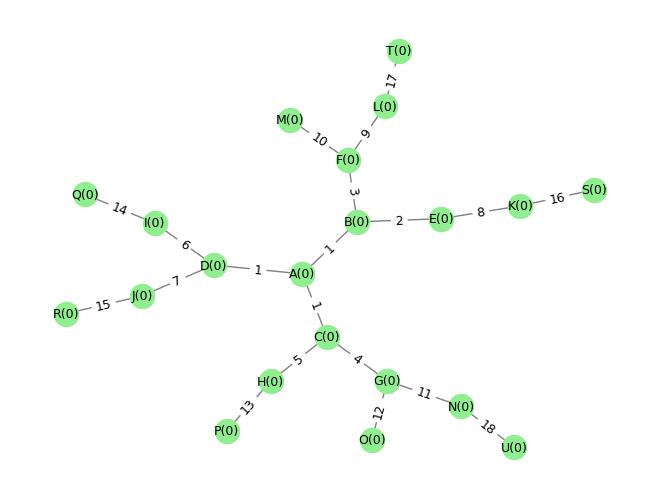

,Nodo,Open,Closed
0,,['A'],[]
1,A,"['B', 'C', 'D']",['A']
2,B,"['C', 'D', 'E', 'F']","['B', 'A']"
3,C,"['D', 'E', 'F', 'G', 'H']","['C', 'B', 'A']"
4,D,"['E', 'F', 'G', 'H', 'I', 'J']","['D', 'C', 'B', 'A']"
5,E,"['F', 'G', 'H', 'I', 'J', 'K']","['E', 'D', 'C', 'B', 'A']"
6,F,"['G', 'H', 'I', 'J', 'K', 'L', 'M']","['F', 'E', 'D', 'C', 'B', 'A']"
7,G,"['H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']","['G', 'F', 'E', 'D', 'C', 'B', 'A']"
8,H,"['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']","['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']"
9,I,"['J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']","['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']"


In [35]:
plotGrafo(grafos[1])
trace = bfs(grafos[1], "A")
plotTable(trace)

In [36]:
# @title **Búsqueda primero en profundidad**
# @markdown Características del DFS:
# @markdown - **🐸**

def dfs(grafo, start, depth=math.inf):
    open, closed, trace = [(start, 0)], [], {"":([start],[])}
    while open:
        current, current_depth = open.pop(0)
        closed.insert(0, current)
        if current_depth < depth:
            for neighbor, weight in grafo[current]:
                if neighbor not in closed and all(neighbor != n[0] for n in open):
                    open.insert(0, (neighbor, current_depth + 1))
        trace[current] = ([n[0] for n in open], closed[:])
    return trace

**Ejemplos:**

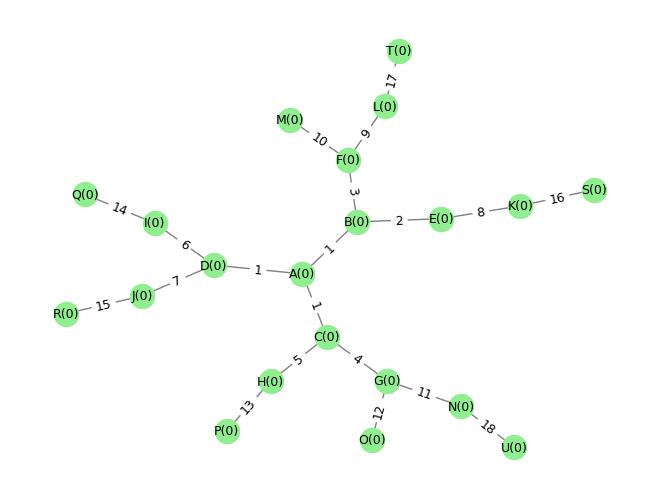

,Nodo,Open,Closed
0,,['A'],[]
1,A,"['D', 'C', 'B']",['A']
2,D,"['J', 'I', 'C', 'B']","['D', 'A']"
3,J,"['R', 'I', 'C', 'B']","['J', 'D', 'A']"
4,R,"['I', 'C', 'B']","['R', 'J', 'D', 'A']"
5,I,"['Q', 'C', 'B']","['I', 'R', 'J', 'D', 'A']"
6,Q,"['C', 'B']","['Q', 'I', 'R', 'J', 'D', 'A']"
7,C,"['H', 'G', 'B']","['C', 'Q', 'I', 'R', 'J', 'D', 'A']"
8,H,"['P', 'G', 'B']","['H', 'C', 'Q', 'I', 'R', 'J', 'D', 'A']"
9,P,"['G', 'B']","['P', 'H', 'C', 'Q', 'I', 'R', 'J', 'D', 'A']"


In [37]:
plotGrafo(grafos[1])
trace = dfs(grafos[1], "A")
plotTable(trace)

In [38]:
# @title **Búsqueda primero en profundidad iterativo**
# @markdown Características del IDS:
# @markdown - **🤯**

def ids(grafo, start, maxDepth=math.inf):
    depth = 0
    trace = {depth : dfs(grafo, start, depth)}
    while depth <= maxDepth and (trace[depth] != trace[max(0, depth-1)] or depth == 0):
        depth += 1
        trace[depth] = dfs(grafo, start, depth)
    del trace[depth]
    return trace

**Ejemplos:**

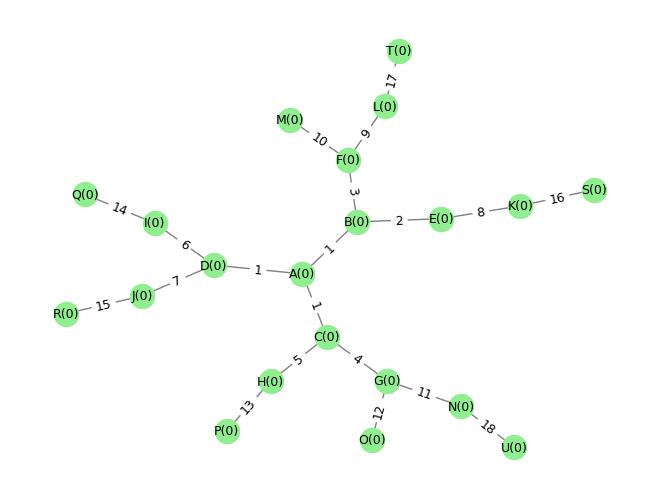

Depth: 0


,Nodo,Open,Closed
0,,['A'],[]
1,A,[],['A']


Depth: 1


,Nodo,Open,Closed
0,,['A'],[]
1,A,"['D', 'C', 'B']",['A']
2,D,"['C', 'B']","['D', 'A']"
3,C,['B'],"['C', 'D', 'A']"
4,B,[],"['B', 'C', 'D', 'A']"


Depth: 2


,Nodo,Open,Closed
0,,['A'],[]
1,A,"['D', 'C', 'B']",['A']
2,D,"['J', 'I', 'C', 'B']","['D', 'A']"
3,J,"['I', 'C', 'B']","['J', 'D', 'A']"
4,I,"['C', 'B']","['I', 'J', 'D', 'A']"
5,C,"['H', 'G', 'B']","['C', 'I', 'J', 'D', 'A']"
6,H,"['G', 'B']","['H', 'C', 'I', 'J', 'D', 'A']"
7,G,['B'],"['G', 'H', 'C', 'I', 'J', 'D', 'A']"
8,B,"['F', 'E']","['B', 'G', 'H', 'C', 'I', 'J', 'D', 'A']"
9,F,['E'],"['F', 'B', 'G', 'H', 'C', 'I', 'J', 'D', 'A']"


Depth: 3


,Nodo,Open,Closed
0,,['A'],[]
1,A,"['D', 'C', 'B']",['A']
2,D,"['J', 'I', 'C', 'B']","['D', 'A']"
3,J,"['R', 'I', 'C', 'B']","['J', 'D', 'A']"
4,R,"['I', 'C', 'B']","['R', 'J', 'D', 'A']"
5,I,"['Q', 'C', 'B']","['I', 'R', 'J', 'D', 'A']"
6,Q,"['C', 'B']","['Q', 'I', 'R', 'J', 'D', 'A']"
7,C,"['H', 'G', 'B']","['C', 'Q', 'I', 'R', 'J', 'D', 'A']"
8,H,"['P', 'G', 'B']","['H', 'C', 'Q', 'I', 'R', 'J', 'D', 'A']"
9,P,"['G', 'B']","['P', 'H', 'C', 'Q', 'I', 'R', 'J', 'D', 'A']"


Depth: 4


,Nodo,Open,Closed
0,,['A'],[]
1,A,"['D', 'C', 'B']",['A']
2,D,"['J', 'I', 'C', 'B']","['D', 'A']"
3,J,"['R', 'I', 'C', 'B']","['J', 'D', 'A']"
4,R,"['I', 'C', 'B']","['R', 'J', 'D', 'A']"
5,I,"['Q', 'C', 'B']","['I', 'R', 'J', 'D', 'A']"
6,Q,"['C', 'B']","['Q', 'I', 'R', 'J', 'D', 'A']"
7,C,"['H', 'G', 'B']","['C', 'Q', 'I', 'R', 'J', 'D', 'A']"
8,H,"['P', 'G', 'B']","['H', 'C', 'Q', 'I', 'R', 'J', 'D', 'A']"
9,P,"['G', 'B']","['P', 'H', 'C', 'Q', 'I', 'R', 'J', 'D', 'A']"


In [39]:
plotGrafo(grafos[1])
trace = ids(grafos[1], "A")
for depth, trace in trace.items():
    print(f"Depth: {depth}")
    plotTable(trace)

In [40]:
# @title **Primero mejor**
# @markdown Características del primero mejor:
# @markdown - **🐱‍👤**

def pm(grafo, start, h=(lambda n:0)):
    fPrint = lambda n : f"{n[0]}({n[1]})"
    open, closed, trace = [(start, h(start))], [], {"":([fPrint((start, h(start)))],[])}
    while open:
        current = open.pop(0)
        closed.insert(0, current)
        for neighbor, weight in grafo[current[0]]:
            if all(neighbor != n[0] for n in closed) and all(neighbor != n[0] for n in open):
                open.append((neighbor, h(neighbor)))
            elif any(neighbor == n[0] for n in open):
                index = next((i for i, v in enumerate(open) if v[0] == neighbor), None)
                if index is not None and open[index][1] > h(neighbor): open[index] = (neighbor, h(neighbor))
            elif any(neighbor == n[0] for n in closed):
                index = next((i for i, v in enumerate(closed) if v[0] == neighbor), None)
                if index is not None and closed[index][1] > h(neighbor):
                    del closed[index]
                    open.append((neighbor, h(neighbor)))

        open.sort(key=lambda x:x[1])
        trace[fPrint(current)] = ([fPrint(i) for i in open], [fPrint(i) for i in closed])
    return trace

**Ejemplos:**

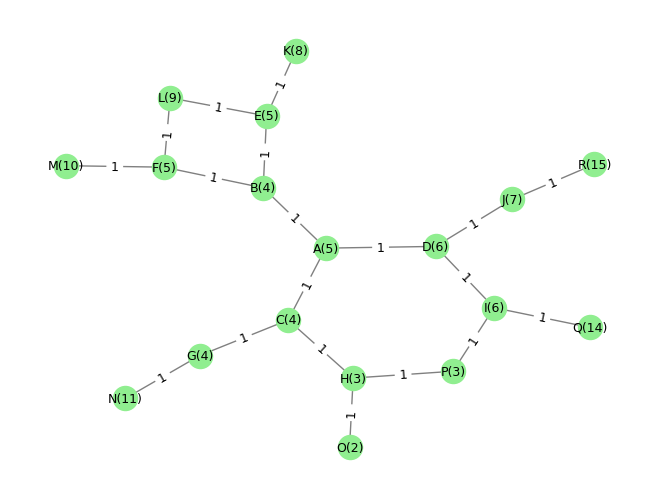

,Nodo,Open,Closed
0,,['A(5)'],[]
1,A(5),"['B(4)', 'C(4)', 'D(6)']",['A(5)']
2,B(4),"['C(4)', 'E(5)', 'F(5)', 'D(6)']","['B(4)', 'A(5)']"
3,C(4),"['H(3)', 'G(4)', 'E(5)', 'F(5)', 'D(6)']","['C(4)', 'B(4)', 'A(5)']"
4,H(3),"['O(2)', 'P(3)', 'G(4)', 'E(5)', 'F(5)', 'D(6)']","['H(3)', 'C(4)', 'B(4)', 'A(5)']"
5,O(2),"['P(3)', 'G(4)', 'E(5)', 'F(5)', 'D(6)']","['O(2)', 'H(3)', 'C(4)', 'B(4)', 'A(5)']"
6,P(3),"['G(4)', 'E(5)', 'F(5)', 'D(6)']","['P(3)', 'O(2)', 'H(3)', 'C(4)', 'B(4)', 'A(5)']"
7,G(4),"['E(5)', 'F(5)', 'D(6)', 'N(11)']","['G(4)', 'P(3)', 'O(2)', 'H(3)', 'C(4)', 'B(4)', 'A(5)']"
8,E(5),"['F(5)', 'D(6)', 'K(8)', 'L(9)', 'N(11)']","['E(5)', 'G(4)', 'P(3)', 'O(2)', 'H(3)', 'C(4)', 'B(4)', 'A(5)']"
9,F(5),"['D(6)', 'K(8)', 'L(9)', 'M(10)', 'N(11)']","['F(5)', 'E(5)', 'G(4)', 'P(3)', 'O(2)', 'H(3)', 'C(4)', 'B(4)', 'A(5)']"


In [41]:
plotGrafo(grafos[2], h)
trace = pm(grafos[2], "A", h)
plotTable(trace)

In [42]:
# @title **A/A***
# @markdown Características del A:
# @markdown - **🅰**

def a(grafo, start, h=(lambda n:0)):
    fPrint = lambda n : f"{n[0]}({n[1]})"
    open, closed, trace = [(start, h(start), 0)], [], {"":([fPrint((start, h(start)))],[])}
    while open:
        current = open.pop(0)
        closed.insert(0, current)
        for neighbor, weight in grafo[current[0]]:
            if all(neighbor != n[0] for n in closed) and all(neighbor != n[0] for n in open):
                open.append((neighbor, h(neighbor)+weight+current[2], current[2]+weight))
            elif any(neighbor == n[0] for n in open):
                index = next((i for i, v in enumerate(open) if v[0] == neighbor), None)
                if index is not None and open[index][1] > h(neighbor)+weight+current[2]: open[index] = (neighbor, h(neighbor)+weight+current[2], current[2]+weight)
            elif any(neighbor == n[0] for n in closed):
                index = next((i for i, v in enumerate(closed) if v[0] == neighbor), None)
                if index is not None and closed[index][1] > h(neighbor)+weight+current[2]:
                    del closed[index]
                    open.append((neighbor, h(neighbor)+weight+current[2], current[2]+weight))
        open.sort(key=lambda x:x[1])
        trace[fPrint(current)] = ([fPrint(i) for i in open], [fPrint(i) for i in closed])
    return trace

**Ejemplos:**

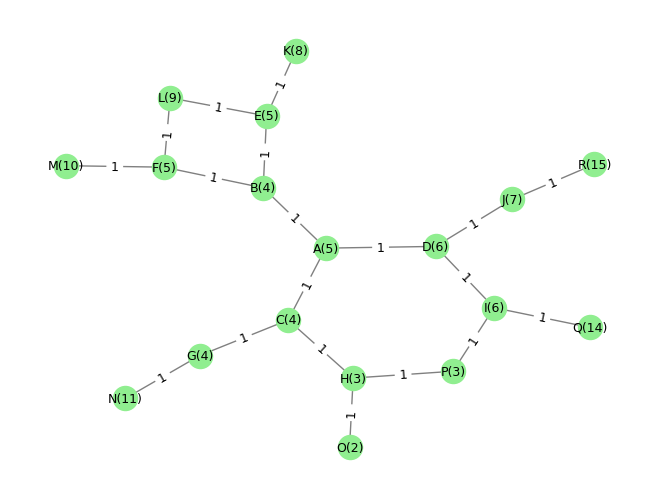

,Nodo,Open,Closed
0,,['A(5)'],[]
1,A(5),"['B(5)', 'C(5)', 'D(7)']",['A(5)']
2,B(5),"['C(5)', 'D(7)', 'E(7)', 'F(7)']","['B(5)', 'A(5)']"
3,C(5),"['H(5)', 'G(6)', 'D(7)', 'E(7)', 'F(7)']","['C(5)', 'B(5)', 'A(5)']"
4,H(5),"['O(5)', 'G(6)', 'P(6)', 'D(7)', 'E(7)', 'F(7)']","['H(5)', 'C(5)', 'B(5)', 'A(5)']"
5,O(5),"['G(6)', 'P(6)', 'D(7)', 'E(7)', 'F(7)']","['O(5)', 'H(5)', 'C(5)', 'B(5)', 'A(5)']"
6,G(6),"['P(6)', 'D(7)', 'E(7)', 'F(7)', 'N(14)']","['G(6)', 'O(5)', 'H(5)', 'C(5)', 'B(5)', 'A(5)']"
7,P(6),"['D(7)', 'E(7)', 'F(7)', 'N(14)']","['P(6)', 'G(6)', 'O(5)', 'H(5)', 'C(5)', 'B(5)', 'A(5)']"
8,D(7),"['E(7)', 'F(7)', 'I(8)', 'J(9)', 'N(14)']","['D(7)', 'P(6)', 'G(6)', 'O(5)', 'H(5)', 'C(5)', 'B(5)', 'A(5)']"
9,E(7),"['F(7)', 'I(8)', 'J(9)', 'K(11)', 'L(12)', 'N(14)']","['E(7)', 'D(7)', 'P(6)', 'G(6)', 'O(5)', 'H(5)', 'C(5)', 'B(5)', 'A(5)']"


In [43]:
plotGrafo(grafos[2], h)
trace = a(grafos[2], "A", h)
plotTable(trace)

**Ejemplos sobre el mismo grafo**

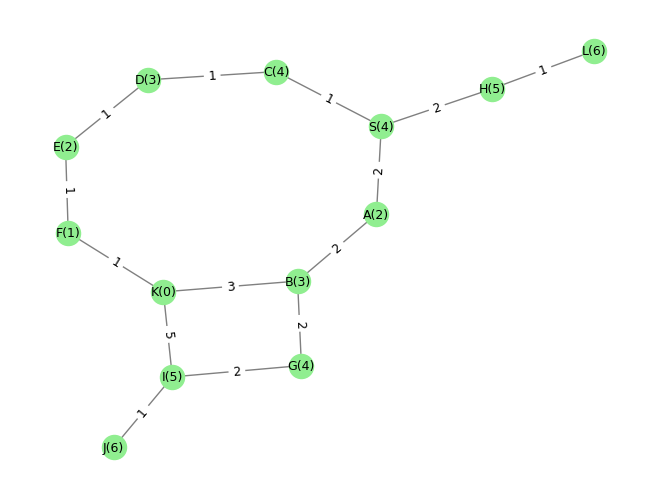

,Nodo,Open,Closed
0,,['S'],[]
1,S,"['H', 'C', 'A']",['S']
2,H,"['L', 'C', 'A']","['H', 'S']"
3,L,"['C', 'A']","['L', 'H', 'S']"
4,C,"['D', 'A']","['C', 'L', 'H', 'S']"
5,D,"['E', 'A']","['D', 'C', 'L', 'H', 'S']"
6,E,"['F', 'A']","['E', 'D', 'C', 'L', 'H', 'S']"
7,F,"['K', 'A']","['F', 'E', 'D', 'C', 'L', 'H', 'S']"
8,K,['A'],"['K', 'F', 'E', 'D', 'C', 'L', 'H', 'S']"
9,A,['B'],"['A', 'K', 'F', 'E', 'D', 'C', 'L', 'H', 'S']"


,Nodo,Open,Closed
0,,['S(4)'],[]
1,S(4),"['A(4)', 'C(5)', 'H(7)']",['S(4)']
2,A(4),"['C(5)', 'H(7)', 'B(7)']","['A(4)', 'S(4)']"
3,C(5),"['D(5)', 'H(7)', 'B(7)']","['C(5)', 'A(4)', 'S(4)']"
4,D(5),"['E(5)', 'H(7)', 'B(7)']","['D(5)', 'C(5)', 'A(4)', 'S(4)']"
5,E(5),"['F(5)', 'H(7)', 'B(7)']","['E(5)', 'D(5)', 'C(5)', 'A(4)', 'S(4)']"
6,F(5),"['K(5)', 'H(7)', 'B(7)']","['F(5)', 'E(5)', 'D(5)', 'C(5)', 'A(4)', 'S(4)']"
7,K(5),"['H(7)', 'B(7)']","['K(5)', 'F(5)', 'E(5)', 'D(5)', 'C(5)', 'A(4)', 'S(4)']"
8,H(7),"['B(7)', 'L(9)']","['H(7)', 'K(5)', 'F(5)', 'E(5)', 'D(5)', 'C(5)', 'A(4)', 'S(4)']"
9,B(7),"['L(9)', 'G(10)']","['B(7)', 'H(7)', 'K(5)', 'F(5)', 'E(5)', 'D(5)', 'C(5)', 'A(4)', 'S(4)']"


,Nodo,Open,Closed
0,,['S(0)'],[]
1,S(0),"['C(1)', 'A(2)', 'H(2)']",['S(0)']
2,C(1),"['A(2)', 'H(2)', 'D(2)']","['C(1)', 'S(0)']"
3,A(2),"['H(2)', 'D(2)', 'B(4)']","['A(2)', 'C(1)', 'S(0)']"
4,H(2),"['D(2)', 'L(3)', 'B(4)']","['H(2)', 'A(2)', 'C(1)', 'S(0)']"
5,D(2),"['L(3)', 'E(3)', 'B(4)']","['D(2)', 'H(2)', 'A(2)', 'C(1)', 'S(0)']"
6,L(3),"['E(3)', 'B(4)']","['L(3)', 'D(2)', 'H(2)', 'A(2)', 'C(1)', 'S(0)']"
7,E(3),"['B(4)', 'F(4)']","['E(3)', 'L(3)', 'D(2)', 'H(2)', 'A(2)', 'C(1)', 'S(0)']"
8,B(4),"['F(4)', 'G(6)', 'K(7)']","['B(4)', 'E(3)', 'L(3)', 'D(2)', 'H(2)', 'A(2)', 'C(1)', 'S(0)']"
9,F(4),"['K(5)', 'G(6)']","['F(4)', 'B(4)', 'E(3)', 'L(3)', 'D(2)', 'H(2)', 'A(2)', 'C(1)', 'S(0)']"


In [44]:
plotGrafo(grafos[3], h1)

trace = dfs(grafos[3], "S") #DFS
plotTable(trace)

trace = a(grafos[3], "S", h1) #A/A* (depende de heurística admisible)
plotTable(trace)

trace = a(grafos[3], "S", (lambda x:0)) #Coste uniforme, heurística=0
plotTable(trace)

**Ejemplos con heurísticas**


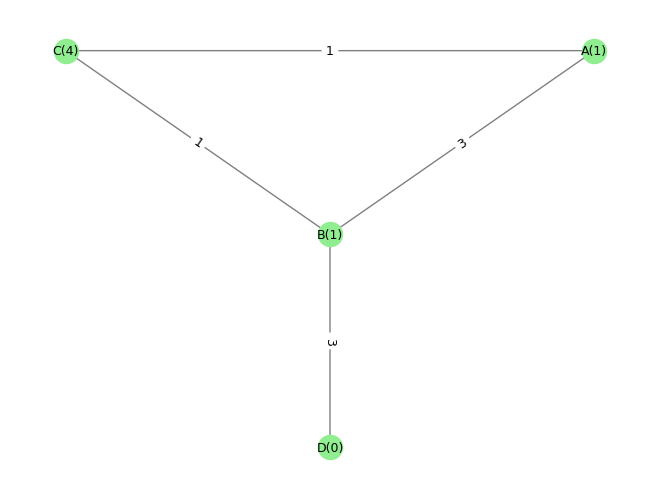

,Nodo,Open,Closed
0,,['A'],[]
1,A,"['B', 'C']",['A']
2,B,"['C', 'D']","['B', 'A']"
3,C,['D'],"['C', 'B', 'A']"
4,D,[],"['D', 'C', 'B', 'A']"


,Nodo,Open,Closed
0,,['A(1)'],[]
1,A(1),"['B(4)', 'C(5)']",['A(1)']
2,B(4),"['C(5)', 'D(6)']","['B(4)', 'A(1)']"
3,C(5),"['B(3)', 'D(6)']","['C(5)', 'A(1)']"
4,B(3),['D(5)'],"['B(3)', 'C(5)', 'A(1)']"
5,D(5),[],"['D(5)', 'B(3)', 'C(5)', 'A(1)']"


In [45]:
heuristica = lambda n : {
    'A': 1, 'B': 1, 'C': 4, 'D': 0
}.get(n, 0) #Admisible y no monótona para el grafo grafos[0]

plotGrafo(grafos[0], heuristica)

trace = bfs(grafos[0], "A") #BFS
plotTable(trace)

trace = a(grafos[0], "A", heuristica) #A* (Porque la heurística es admisible)
plotTable(trace)

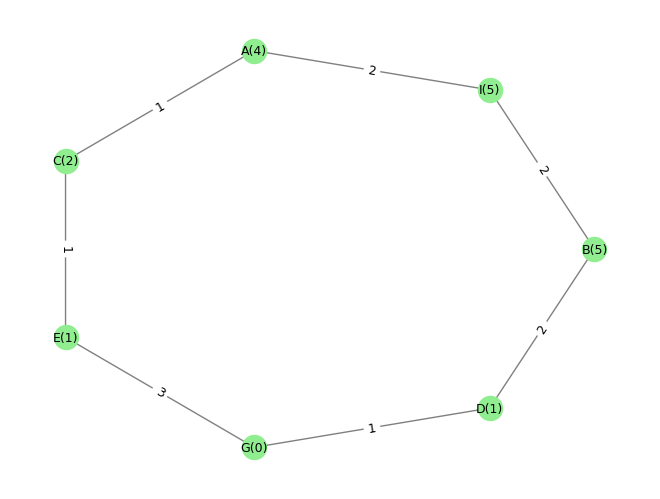

,Nodo,Open,Closed
0,,['I'],[]
1,I,"['A', 'B']",['I']
2,A,"['B', 'C']","['A', 'I']"
3,B,"['C', 'D']","['B', 'A', 'I']"
4,C,"['D', 'E']","['C', 'B', 'A', 'I']"
5,D,"['E', 'G']","['D', 'C', 'B', 'A', 'I']"
6,E,['G'],"['E', 'D', 'C', 'B', 'A', 'I']"
7,G,[],"['G', 'E', 'D', 'C', 'B', 'A', 'I']"


,Nodo,Open,Closed
0,,['I(5)'],[]
1,I(5),"['A(6)', 'B(7)']",['I(5)']
2,A(6),"['C(5)', 'B(7)']","['A(6)', 'I(5)']"
3,C(5),"['E(5)', 'B(7)']","['C(5)', 'A(6)', 'I(5)']"
4,E(5),"['B(7)', 'G(7)']","['E(5)', 'C(5)', 'A(6)', 'I(5)']"
5,B(7),"['D(5)', 'G(7)']","['B(7)', 'E(5)', 'C(5)', 'A(6)', 'I(5)']"
6,D(5),['G(5)'],"['D(5)', 'B(7)', 'E(5)', 'C(5)', 'A(6)', 'I(5)']"
7,G(5),[],"['G(5)', 'D(5)', 'B(7)', 'E(5)', 'C(5)', 'A(6)', 'I(5)']"


In [46]:
heuristica = lambda n : {
    'I': 5, 'A': 4, 'B': 5, 'C': 2, 'D': 1, 'E': 1, 'G': 0
}.get(n, 0) #No admisible y no monótona para el grafo grafos[10]

plotGrafo(grafos[10], heuristica)

trace = bfs(grafos[10], "I") #BFS
plotTable(trace)

trace = a(grafos[10], "I", heuristica) #A (Porque la heurística no es admisible)
plotTable(trace)

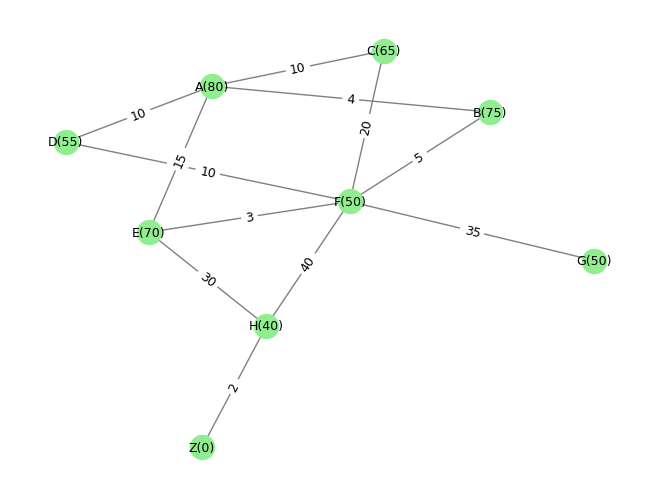

,Nodo,Open,Closed
0,,['A'],[]
1,A,"['B', 'C', 'D', 'E']",['A']
2,B,"['C', 'D', 'E', 'F']","['B', 'A']"
3,C,"['D', 'E', 'F']","['C', 'B', 'A']"
4,D,"['E', 'F']","['D', 'C', 'B', 'A']"
5,E,"['F', 'H']","['E', 'D', 'C', 'B', 'A']"
6,F,"['H', 'G']","['F', 'E', 'D', 'C', 'B', 'A']"
7,H,"['G', 'Z']","['H', 'F', 'E', 'D', 'C', 'B', 'A']"
8,G,['Z'],"['G', 'H', 'F', 'E', 'D', 'C', 'B', 'A']"
9,Z,[],"['Z', 'G', 'H', 'F', 'E', 'D', 'C', 'B', 'A']"


,Nodo,Open,Closed
0,,['A(80)'],[]
1,A(80),"['D(65)', 'C(75)', 'B(79)', 'E(85)']",['A(80)']
2,D(65),"['F(70)', 'C(75)', 'B(79)', 'E(85)']","['D(65)', 'A(80)']"
3,F(70),"['C(75)', 'B(79)', 'E(85)', 'H(100)', 'G(105)']","['F(70)', 'D(65)', 'A(80)']"
4,C(75),"['B(79)', 'E(85)', 'H(100)', 'G(105)']","['C(75)', 'F(70)', 'D(65)', 'A(80)']"
5,B(79),"['F(59)', 'E(85)', 'H(100)', 'G(105)']","['B(79)', 'C(75)', 'D(65)', 'A(80)']"
6,F(59),"['E(85)', 'H(89)', 'G(94)']","['F(59)', 'B(79)', 'C(75)', 'D(65)', 'A(80)']"
7,E(85),"['H(85)', 'G(94)']","['E(85)', 'F(59)', 'B(79)', 'C(75)', 'D(65)', 'A(80)']"
8,H(85),"['Z(47)', 'G(94)']","['H(85)', 'E(85)', 'F(59)', 'B(79)', 'C(75)', 'D(65)', 'A(80)']"
9,Z(47),['G(94)'],"['Z(47)', 'H(85)', 'E(85)', 'F(59)', 'B(79)', 'C(75)', 'D(65)', 'A(80)']"


In [48]:
heuristica = lambda n : {
    'A': 80, 'B': 75, 'C': 65, 'D': 55, 'E': 70, 'F': 50, 'G': 50, 'H': 40, 'Z': 0
}.get(n, 0) #No admisible y no monótona para el grafo grafos[11]

plotGrafo(grafos[11], heuristica)

trace = bfs(grafos[11], "A") #BFS
plotTable(trace)

trace = a(grafos[11], "A", heuristica) #A (Porque la heurística no es admisible)
plotTable(trace)

In [ ]:
# @title **Poda Alfa-Beta***
# @markdown Características de la poda Alfa-Beta:
# @markdown - **🌴🤬🌴**

def funcionQueHaceTuVidaMasFacil(trace, start, a, b): #En realidad no😥
    tmp = trace[-1].copy()
    tmp[start] = f"({a}, {b})"
    trace.append(tmp)

def alphaBeta(graph, start, alpha, beta, trace, juegaMax=True, h=(lambda n:0), depth=math.inf):
    funcionQueHaceTuVidaMasFacil(trace, start, alpha, beta)
    if depth == 0 or start not in graph or not graph[start]:
        funcionQueHaceTuVidaMasFacil(trace, start, alpha, beta)
        return h(start)

    if juegaMax:
        for neighbor, weight in graph[start]:
            eval = alphaBeta(graph, neighbor, alpha, beta, trace, False, h, depth - 1)
            alpha = max(alpha, eval)
            if beta <= alpha:
                funcionQueHaceTuVidaMasFacil(trace, start, alpha, beta)
                return beta
        funcionQueHaceTuVidaMasFacil(trace, start, alpha, beta)
        return alpha
    else:
        for neighbor, weight in graph[start]:
            eval = alphaBeta(graph, neighbor, alpha, beta, trace, True, h, depth - 1)
            beta = min(beta, eval)
            if beta <= alpha:
                funcionQueHaceTuVidaMasFacil(trace, start, alpha, beta)
                return alpha
        funcionQueHaceTuVidaMasFacil(trace, start, alpha, beta)
        return beta

**Ejemplos:**

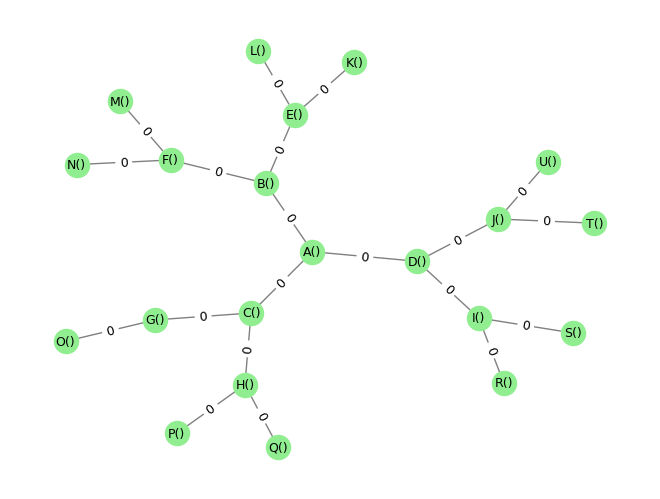

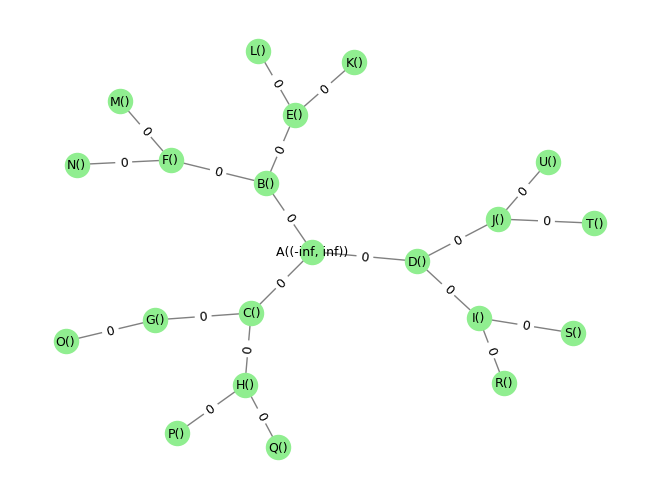

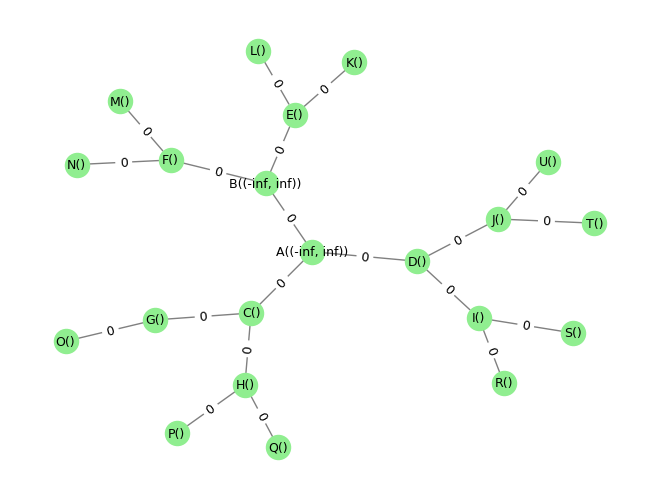

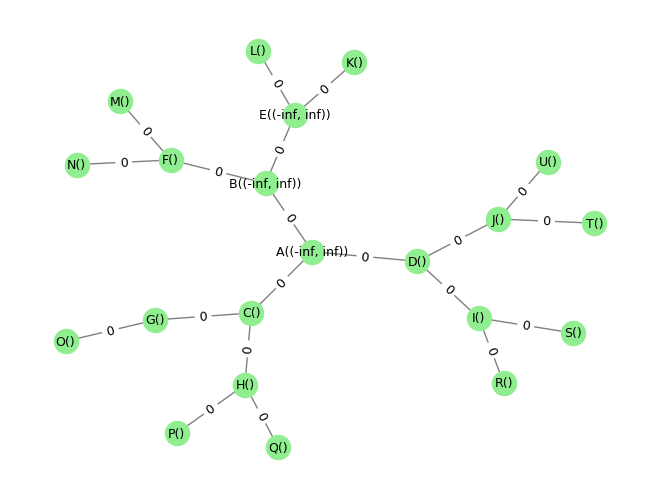

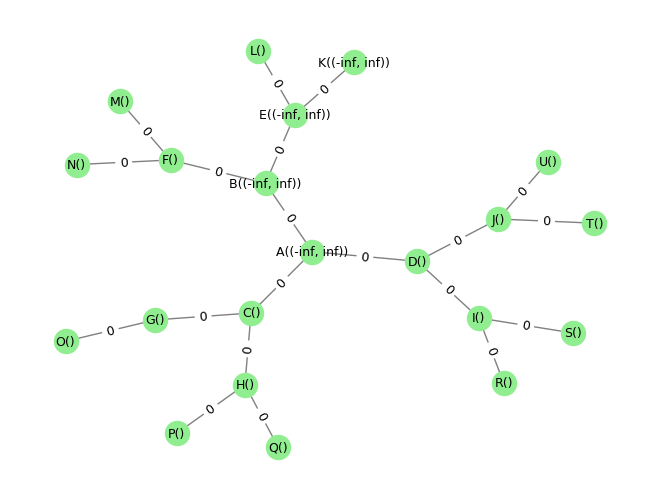

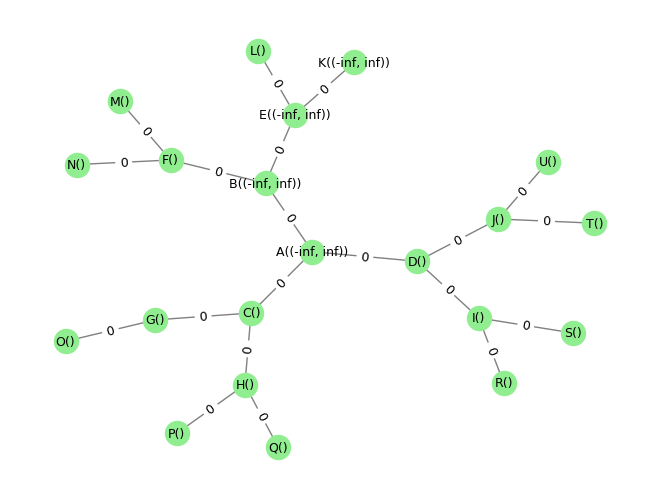

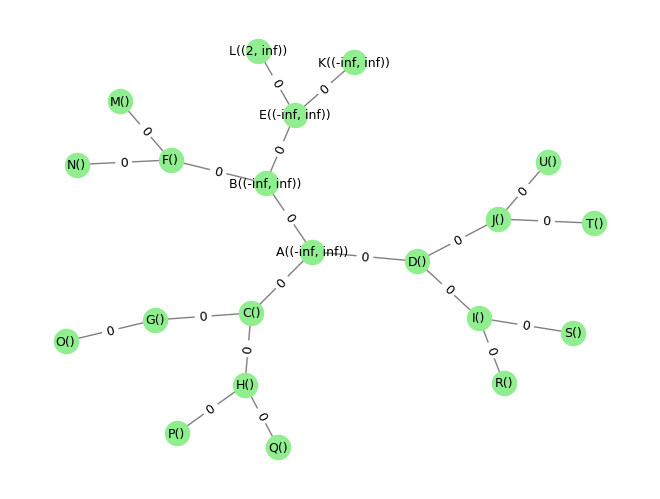

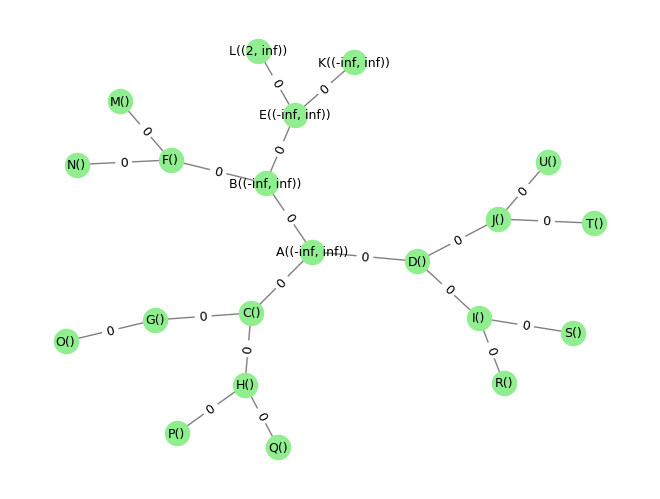

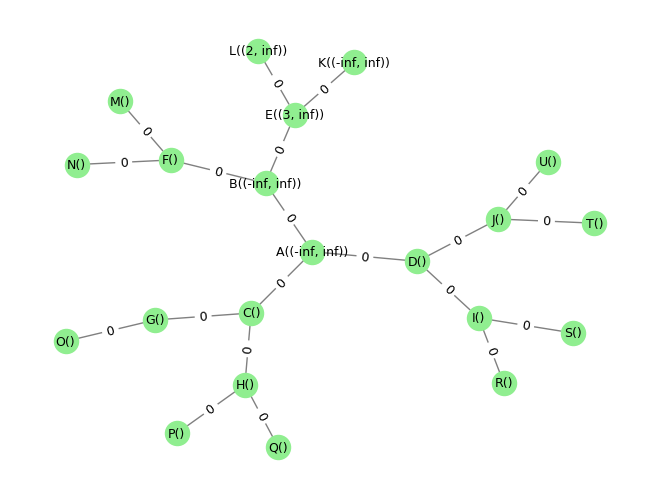

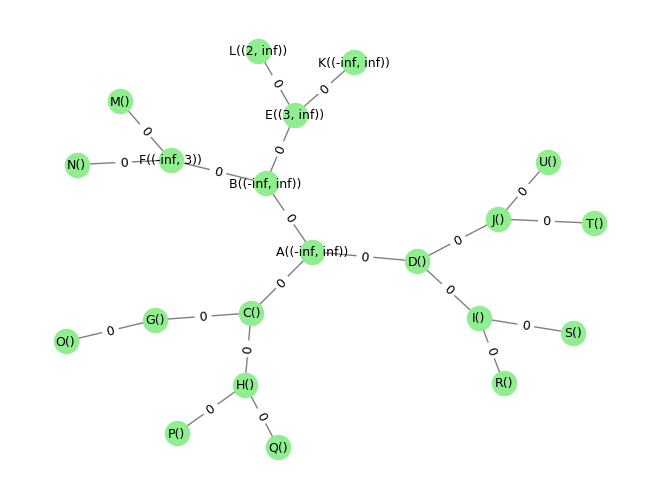

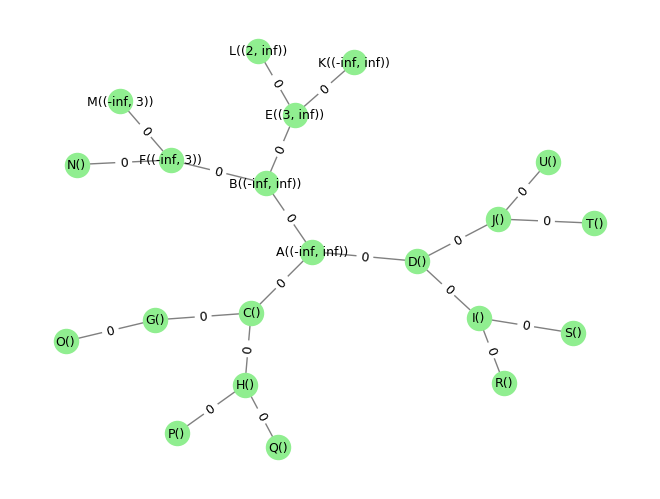

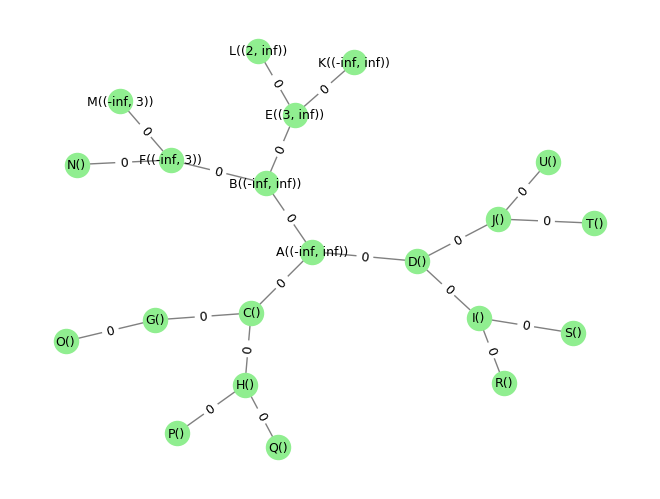

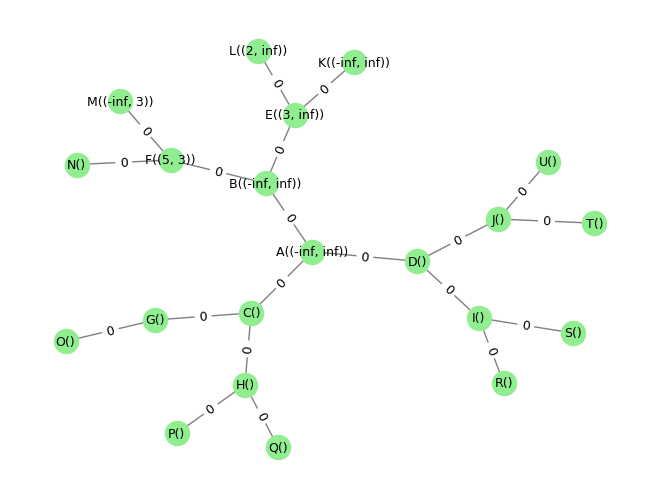

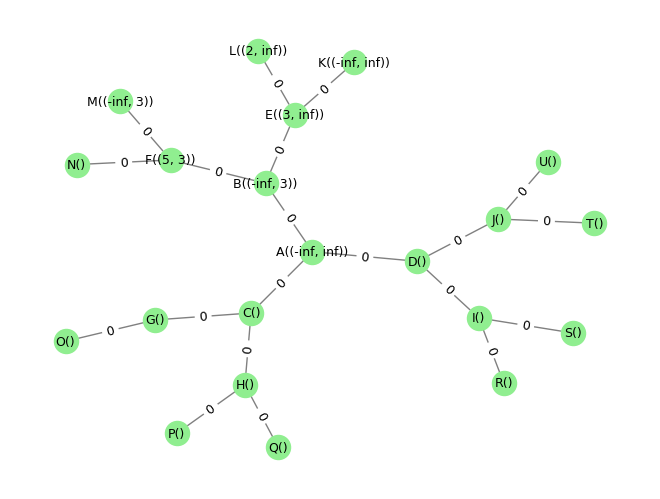

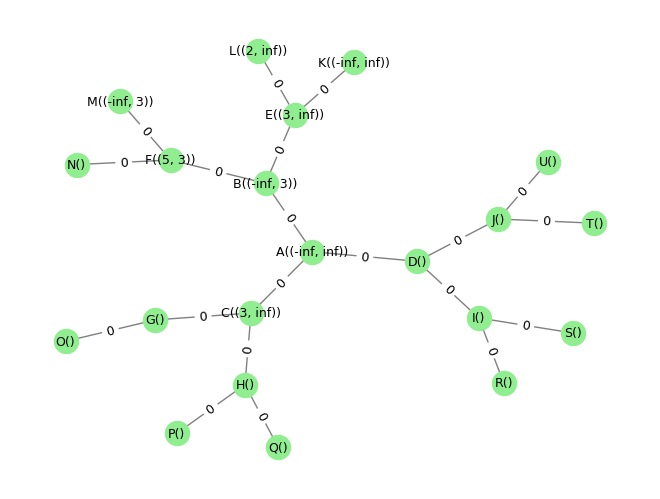

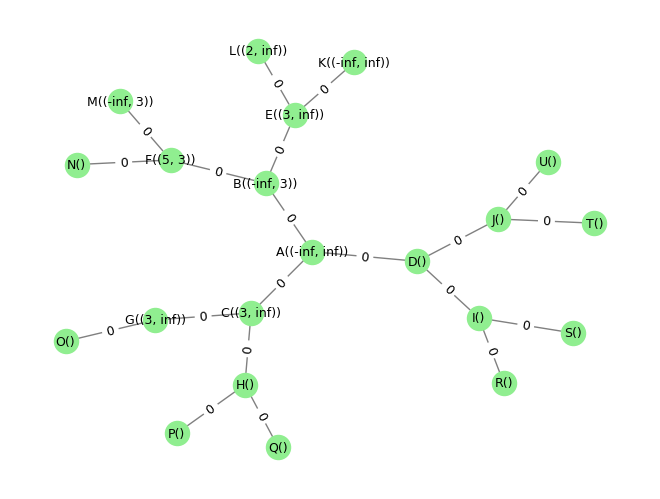

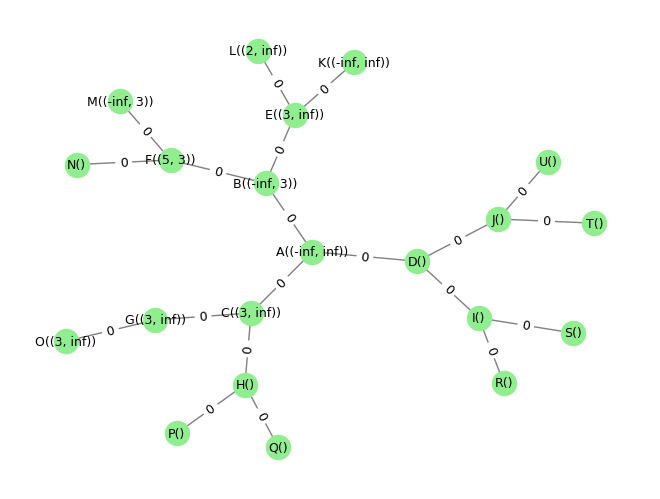

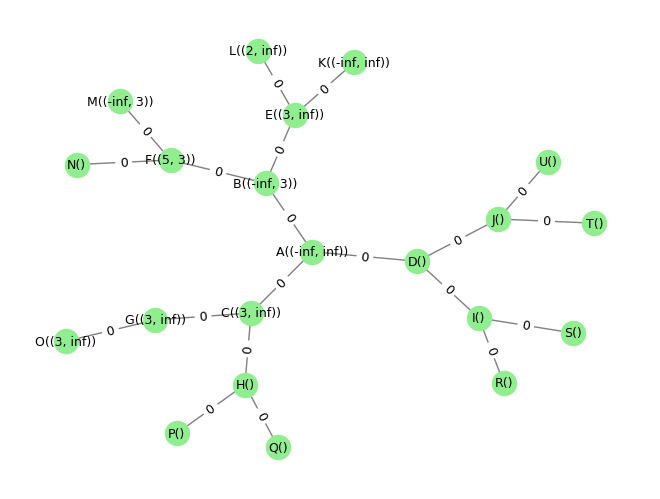

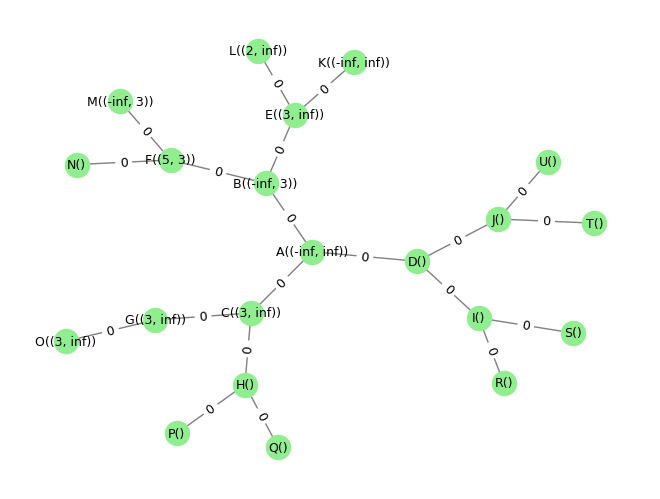

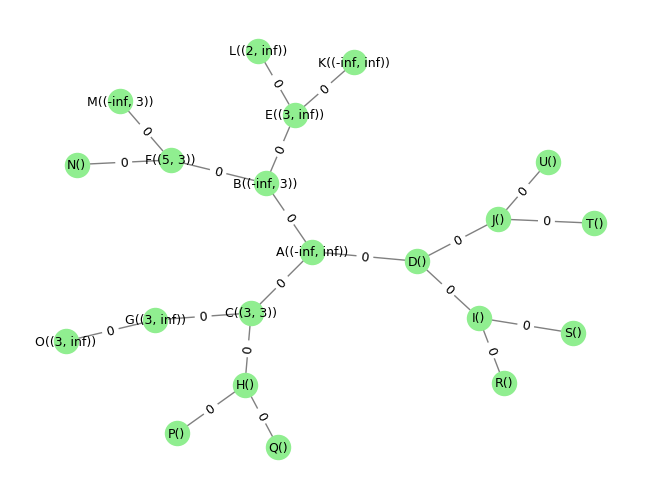

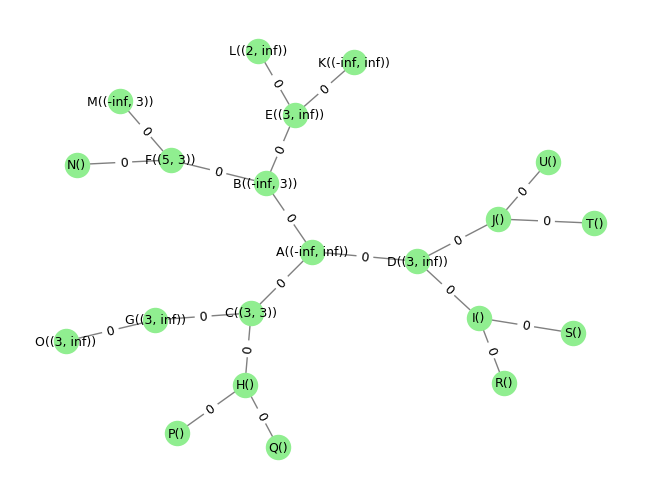

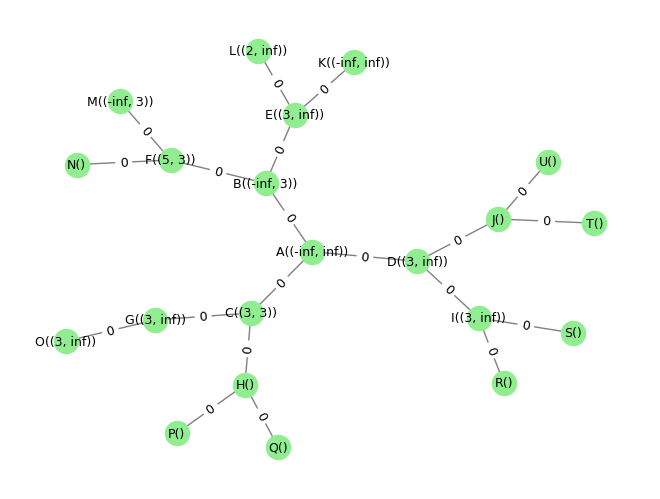

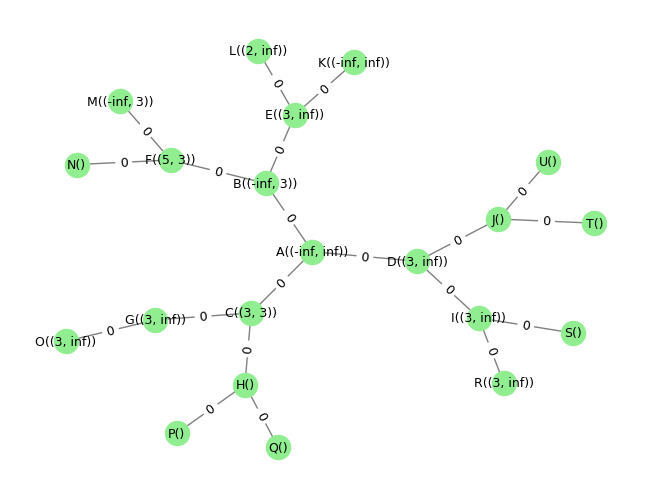

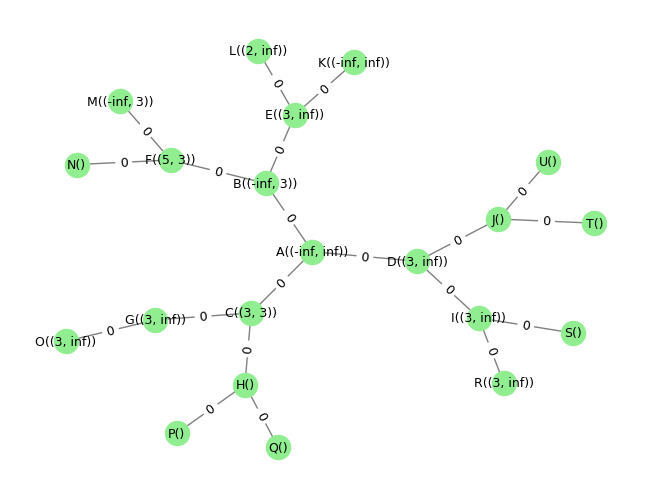

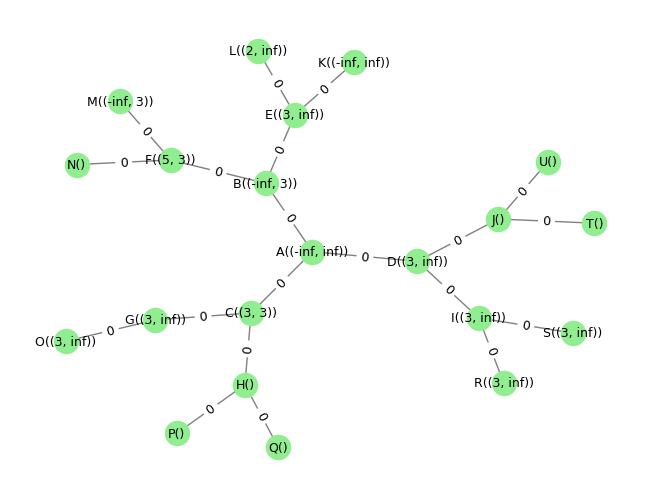

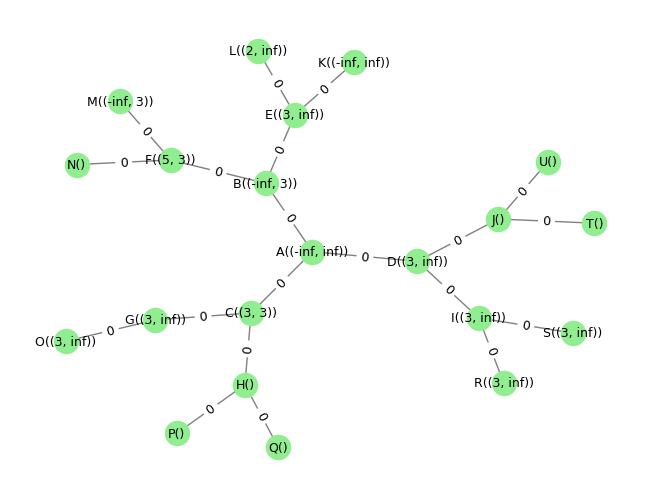

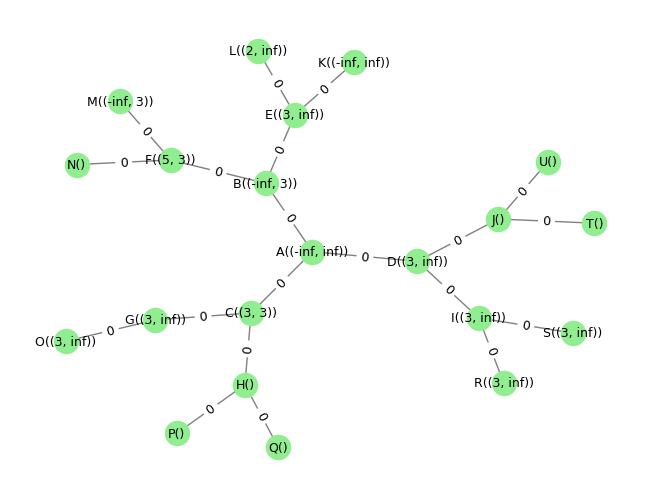

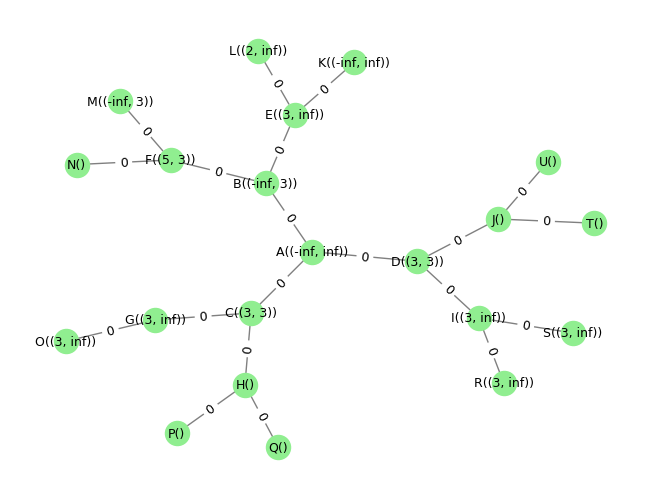

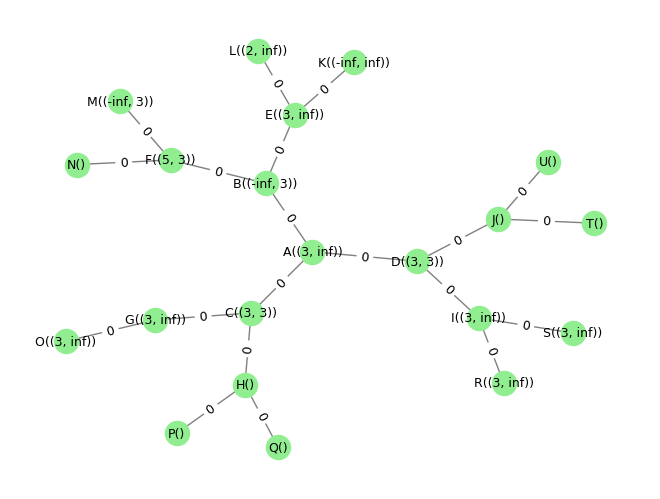

In [ ]:
trace = [{key: "" for key in grafos[4].keys()}]
alphaBeta(grafos[4], 'A', -math.inf, math.inf, trace, True, h2)

for map in trace:
    plotGrafo(grafos[4], (lambda key:map.get(key, "")))

In [ ]:
trace = [{key: "" for key in grafos[5].keys()}]
alphaBeta(grafos[5], 'A', -math.inf, math.inf, trace, True, h3)

for map in trace:
    plotGrafo(grafos[5], (lambda key:map.get(key, "")))

In [ ]:
trace = [{key: "" for key in grafos[6].keys()}]
alphaBeta(grafos[6], 'A', -math.inf, math.inf, trace, True, h4)

for map in trace:
    plotGrafo(grafos[6], (lambda key:map.get(key, "")))

In [ ]:
trace = [{key: "" for key in grafos[7].keys()}]
alphaBeta(grafos[7], 'A', -math.inf, math.inf, trace, True, h5)

for map in trace:
    plotGrafo(grafos[7], (lambda key:map.get(key, "")))

In [ ]:
trace = [{key: "" for key in grafos[8].keys()}]
alphaBeta(grafos[8], 'A', -math.inf, math.inf, trace, True, h6)

for map in trace:
    plotGrafo(grafos[8], (lambda key:map.get(key, "")))

In [ ]:
trace = [{key: "" for key in grafos[9].keys()}]
alphaBeta(grafos[9], 'A', -math.inf, math.inf, trace, False, h7) #Empieza MIN😏

for map in trace:
    plotGrafo(grafos[9], (lambda key:map.get(key, "")))

In [ ]:
trace = [{key: "" for key in grafos[9].keys()}]
alphaBeta(grafos[9], 'A', -math.inf, math.inf, trace, True, h7)

for map in trace:
    plotGrafo(grafos[9], (lambda key:map.get(key, "")))